In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))


/tmp/ipykernel_6231/3455354848.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# What is good food?

## 📖 Background
You and your friend have gotten into a debate about nutrition. Your friend follows a high-protein diet and does not eat any carbohydrates (no grains, no fruits). You claim that a balanced diet should contain all nutrients but should be low in calories. Both of you quickly realize that most of what you know about nutrition comes from mainstream and social media.

Being the data scientist that you are, you offer to look at the data yourself to answer a few key questions.

## 💾 The data

You source nutrition data from USDA's FoodData Central [website](https://fdc.nal.usda.gov/download-datasets.html). This data contains the calorie content of 7,793 common foods, as well as their nutritional composition. Each row represents one food item, and nutritional values are based on a 100g serving. Here is a description of the columns:

- **FDC_ID**: A unique identifier for each food item in the database.
- **Item**: The name or description of the food product.
- **Category**: The category or classification of the food item, such as "Baked Products" or "Vegetables and Vegetable Products".
- **Calories**: The energy content of the food, presented in kilocalories (kcal).
- **Protein**: The protein content of the food, measured in grams.
- **Carbohydrate**: The carbohydrate content of the food, measured in grams.
- **Total fat**: The total fat content of the food, measured in grams.
- **Cholesterol**: The cholesterol content of the food, measured in milligrams.
- **Fiber**: The dietary fiber content of the food, measured in grams.
- **Water**: The water content of the food, measured in grams.
- **Alcohol**: The alcohol content of the food (if any), measured in grams.
- **Vitamin C**: The Vitamin C content of the food, measured in milligrams.

In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import re



In [3]:
df = pd.read_csv('data/nutrition.csv')

In [4]:
df.head()

,FDC_ID,Item,Category,Calories,Protein,Carbohydrate,Total fat,Cholesterol,Fiber,Water,Alcohol,Vitamin C
0,167512,"Pillsbury Golden Layer Buttermilk Biscuits, Ar...",Baked Products,307.0 kcal,5.88 g,41.18 g,13.24 g,0.0 mg,1.2 g,35.5 g,NaN,NaN
1,167513,"Pillsbury, Cinnamon Rolls with Icing, refriger...",Baked Products,330.0 kcal,4.34 g,53.42 g,11.27 g,0.0 mg,1.4 g,27.86 g,NaN,0.1 mg
2,167514,"Kraft Foods, Shake N Bake Original Recipe, Coa...",Baked Products,377.0 kcal,6.1 g,79.8 g,3.7 g,NaN,NaN,3.2 g,NaN,NaN
3,167515,"George Weston Bakeries, Thomas English Muffins",Baked Products,232.0 kcal,8.0 g,46.0 g,1.8 g,NaN,NaN,42.6 g,NaN,NaN
4,167516,"Waffles, buttermilk, frozen, ready-to-heat",Baked Products,273.0 kcal,6.58 g,41.05 g,9.22 g,15.0 mg,2.2 g,40.34 g,0.0 g,0.0 mg


## 💪 Competition challenge

Create a report that covers the following:

1. Which fruit has the highest vitamin C content? What are some other sources of vitamin C?
2. Describe the relationship between the calories and water content of a food item.
3. What are the possible drawbacks of a zero-carb diet? What could be the drawbacks of a very high-protein diet?
4. According to the Cleveland Clinic [website](https://my.clevelandclinic.org/health/articles/4182-fat-and-calories), a gram of fat has around 9 kilocalories, and a gram of protein and a gram of carbohydrate contain 4 kilocalories each. Fit a linear model to test whether these estimates agree with the data.
5. Analyze the errors of your linear model to see what could be the hidden sources of calories in food.

## 🧑‍⚖️ Judging criteria

This competition is for helping to understand how competitions work. This competition will not be judged.

## ✅ Checklist before publishing into the competition
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- **Remove redundant cells** like the judging criteria, so the workbook is focused on your story.
- Make sure the workbook reads well and explains how you found your insights. 
- Try to include an **executive summary** of your recommendations at the beginning.
- Check that all the cells run without error

## ⌛️ Time is ticking. Good luck!

In [5]:
df.sample(3).T

,1755,2052,5915
FDC_ID,170442,167679,169538
Item,"Potatoes, au gratin, home-prepared from recipe...","Restaurant, Chinese, orange chicken","Beef, short loin, top loin, steak, separable l..."
Category,Vegetables and Vegetable Products,Restaurant Foods,Beef Products
Calories,134.0 kcal,262.0 kcal,228.0 kcal
Protein,5.06 g,14.46 g,20.61 g
Carbohydrate,11.26 g,22.46 g,0.0 g
Total fat,7.59 g,12.68 g,15.49 g
Cholesterol,23.0 mg,61.0 mg,81.0 mg
Fiber,1.8 g,0.8 g,0.0 g
Water,74.0 g,48.43 g,63.43 g


In [6]:
dfcat = df[[
 'Category',
 'Calories',
 'Protein',
 'Carbohydrate',
 'Total fat',
 'Cholesterol',
 'Fiber',
 'Water',
 'Alcohol',
 'Vitamin C']]

# Prepare the data

## Split cols in parts

### Split category parts

In [7]:
df['Category']

0                      Baked Products
1                      Baked Products
2                      Baked Products
3                      Baked Products
4                      Baked Products
                    ...              
7788    Lamb, Veal, and Game Products
7789    Lamb, Veal, and Game Products
7790    Lamb, Veal, and Game Products
7791    Lamb, Veal, and Game Products
7792    Lamb, Veal, and Game Products
Name: Category, Length: 7793, dtype: object

In [8]:
df['Category'].str.strip().str.split(" ", expand=True).agg(['count', 'nunique', lambda x: x.isnull().sum()]).T\
    .rename(columns={'<lambda>': 'nulls'})\
    .style.background_gradient(cmap='Blues')

,count,nunique,nulls
0,7793,25,0
1,6893,9,900
2,3742,11,4051
3,3463,8,4330
4,545,2,7248


In [9]:
df['Category'].str.strip().str.replace(" and ", ", ").str.split(", ", expand=True)

,0,1,2
0,Baked Products,None,None
1,Baked Products,None,None
2,Baked Products,None,None
3,Baked Products,None,None
4,Baked Products,None,None
...,...,...,...
7788,Lamb,"Veal,",Game Products
7789,Lamb,"Veal,",Game Products
7790,Lamb,"Veal,",Game Products
7791,Lamb,"Veal,",Game Products


In [10]:
df['Category'].str.strip().str.replace(" and ", ",").str.split(",", n=2, expand=True).agg(['count', 'nunique', lambda x: x.isnull().sum()]).T\
    .rename(columns={'<lambda>': 'nulls'})\
    .style.background_gradient(cmap='Blues')

,count,nunique,nulls
0,7793,25,0
1,3577,13,4216
2,799,3,6994


In [11]:
df[[
    "CategoryPart1",
    "CategoryPart2",
    "CategoryPart3",
]] = df['Category'].str.strip().str.replace(" and ", ", ").str.split(", ", n=2, expand=True)

### Split item parts

In [12]:
df['Item'].str.strip().str.replace(" and ", ",").str.split(",", expand=True)\
    .agg(['count', 'nunique', lambda x: x.isnull().sum()]).T\
    .rename(columns={'<lambda>': 'nulls'})\
    .style.background_gradient(cmap='Blues')

,count,nunique,nulls
0,7793,917,0
1,7696,1886,97
2,6776,1638,1017
3,5277,1054,2516
4,3785,635,4008
5,2638,322,5155
6,1770,137,6023
7,1229,68,6564
8,713,39,7080
9,270,18,7523


In [13]:
df[[
    "ItemPart1",
    "ItemPart2",
    "ItemPart3",
#]] = df['Item'].str.strip().str.split(" ", n=2, expand=True)
]] = df['Item'].str.strip().str.replace(" and ", ", ").str.split(", ", n=2, expand=True)

### Separate qtty and units

In [14]:
cols = [
    'Calories',
    'Protein',
    'Carbohydrate',
    'Total fat',
    'Cholesterol',
    'Fiber',
    'Water',
    'Alcohol',
    'Vitamin C',
]

In [15]:
for col in cols:
    df[[
        col+"Part1",
        col+"Part2",
    ]] = df[col].str.strip().str.split(" ", n=1, expand=True)

## Clean cols

In [17]:
for col in df.filter(like='Part').columns.tolist():
    df[col] = df[col].str.strip(",. ")

## Sort cols

In [18]:
df.columns.tolist()

['FDC_ID',
 'Item',
 'Category',
 'Calories',
 'Protein',
 'Carbohydrate',
 'Total fat',
 'Cholesterol',
 'Fiber',
 'Water',
 'Alcohol',
 'Vitamin C',
 'CategoryPart1',
 'CategoryPart2',
 'CategoryPart3',
 'ItemPart1',
 'ItemPart2',
 'ItemPart3',
 'CaloriesPart1',
 'CaloriesPart2',
 'ProteinPart1',
 'ProteinPart2',
 'CarbohydratePart1',
 'CarbohydratePart2',
 'Total fatPart1',
 'Total fatPart2',
 'CholesterolPart1',
 'CholesterolPart2',
 'FiberPart1',
 'FiberPart2',
 'WaterPart1',
 'WaterPart2',
 'AlcoholPart1',
 'AlcoholPart2',
 'Vitamin CPart1',
 'Vitamin CPart2']

In [19]:
df = df[[
'FDC_ID',
 'Item',
 'ItemPart1',
 'ItemPart2',
 'ItemPart3',
 'CategoryPart1',
 'CategoryPart2',
 'CategoryPart3',
 'CaloriesPart1',
 'CaloriesPart2',
 'ProteinPart1',
 'ProteinPart2',
 'CarbohydratePart1',
 'CarbohydratePart2',
 'Total fatPart1',
 'Total fatPart2',
 'CholesterolPart1',
 'CholesterolPart2',
 'FiberPart1',
 'FiberPart2',
 'WaterPart1',
 'WaterPart2',
 'AlcoholPart1',
 'AlcoholPart2',
 'Vitamin CPart1',
 'Vitamin CPart2']]

In [20]:
df.agg(['count', 'nunique', lambda x: x.isnull().sum()]).T\
    .rename(columns={'<lambda>': 'nulls'})\
    .style.background_gradient(cmap='Blues')

,count,nunique,nulls
FDC_ID,7793,7793,0
Item,7793,7793,0
ItemPart1,7793,918,0
ItemPart2,7694,1879,99
ItemPart3,6775,4982,1018
CategoryPart1,7793,25,0
CategoryPart2,3577,13,4216
CategoryPart3,799,3,6994
CaloriesPart1,7793,667,0
CaloriesPart2,7793,1,0


In [21]:
df.filter(like='Part2').mode()

,ItemPart2,CategoryPart2,CaloriesPart2,ProteinPart2,CarbohydratePart2,Total fatPart2,CholesterolPart2,FiberPart2,WaterPart2,AlcoholPart2,Vitamin CPart2
0,fresh,Vegetable Products,kcal,g,g,g,mg,g,g,g,mg


## Drop unit cols

They have only one value

In [22]:
df.drop([col+'Part2' for col in cols], axis=1, inplace=True)

In [23]:
df.rename(columns={col+'Part1':col for col in cols}, inplace=True)

## Set data type of columns

In [25]:
for col in cols:
    df[col] = df[col].astype(float)

In [26]:
df.dtypes

FDC_ID             int64
Item              object
ItemPart1         object
ItemPart2         object
ItemPart3         object
CategoryPart1     object
CategoryPart2     object
CategoryPart3     object
Calories         float64
Protein          float64
Carbohydrate     float64
Total fat        float64
Cholesterol      float64
Fiber            float64
Water            float64
Alcohol          float64
Vitamin C        float64
dtype: object

# Which fruit has the highest vitamin C content? What are some other sources of vitamin C?

## Filter fruits

In [28]:
df[
    df['CategoryPart1'].str.contains('fruit', flags=re.IGNORECASE)
].filter(like='Category')

,CategoryPart1,CategoryPart2,CategoryPart3
4992,Fruits,Fruit Juices,None
4993,Fruits,Fruit Juices,None
4994,Fruits,Fruit Juices,None
4995,Fruits,Fruit Juices,None
4996,Fruits,Fruit Juices,None
...,...,...,...
5342,Fruits,Fruit Juices,None
5343,Fruits,Fruit Juices,None
5344,Fruits,Fruit Juices,None
5345,Fruits,Fruit Juices,None


In [29]:
df[
    df['CategoryPart1'].str.contains('fruit', flags=re.IGNORECASE)
].filter(like='Category').agg(['count', 'nunique', lambda x: x.isnull().sum()]).T\
    .rename(columns={'<lambda>': 'nulls'})\
    .style.background_gradient(cmap='Blues')

,count,nunique,nulls
CategoryPart1,355,1,0
CategoryPart2,355,1,0
CategoryPart3,0,0,355


In [30]:
df[
    df['CategoryPart1'].str.contains('fruit', flags=re.IGNORECASE)
].filter(like='Category').drop_duplicates()

,CategoryPart1,CategoryPart2,CategoryPart3
4992,Fruits,Fruit Juices,None


In [31]:
mask = (df['CategoryPart1']=='Fruits') & (df['Item'].str.contains('raw'))

In [32]:
df[mask].filter(regex='Item|Vita')\
    .sample(10)

,Item,ItemPart1,ItemPart2,ItemPart3,Vitamin C
5182,"Oheloberries, raw",Oheloberries,raw,None,6.0
5281,"Grapes, muscadine, raw",Grapes,muscadine,raw,6.5
5142,"Orange peel, raw",Orange peel,raw,None,136.0
5335,"Grapefruit, raw, white, all areas",Grapefruit,raw,"white, all areas",33.3
5192,"Tangerine juice, raw",Tangerine juice,raw,None,31.0
5081,"Strawberries, frozen, sweetened, sliced",Strawberries,frozen,"sweetened, sliced",41.4
5062,"Limes, raw",Limes,raw,None,29.1
5323,"Currants, red and white, raw",Currants,red,"white, raw",41.0
5118,"Kiwifruit, ZESPRI SunGold, raw",Kiwifruit,ZESPRI SunGold,raw,161.3
4995,"Lemon peel, raw",Lemon peel,raw,None,129.0


In [33]:
fruits = df[mask].filter(regex='Item|Vita')

## Which fruit has the highest vitamin C content?

In [34]:
fruits['Vitamin C'].describe()

count     119.000000
mean       59.930252
std       210.310672
min         0.200000
25%        10.000000
50%        26.700000
75%        41.100000
max      1677.600000
Name: Vitamin C, dtype: float64

In [35]:
fruits['Vitamin C'].agg(['count', 'nunique', lambda x: x.isnull().sum()]).T\
    .rename(index={'<lambda>': 'nulls'})


count      119
nunique    104
nulls        5
Name: Vitamin C, dtype: int64

<Axes: xlabel='Vitamin C'>

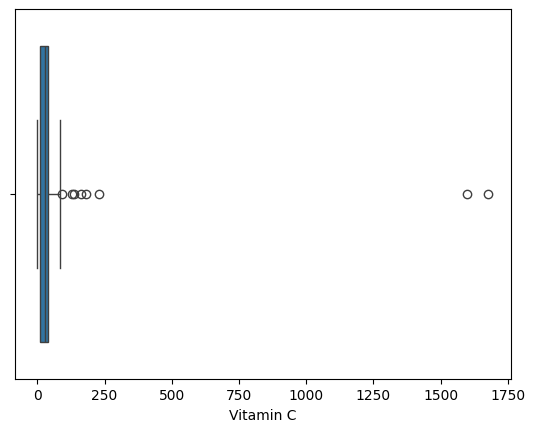

In [36]:
sns.boxplot(data=fruits, x='Vitamin C')

In [37]:
fruits[
    fruits['Vitamin C'] > fruits['Vitamin C'].quantile(.99)
]

,Item,ItemPart1,ItemPart2,ItemPart3,Vitamin C
5220,"Acerola, (west indian cherry), raw",Acerola,(west indian cherry),raw,1677.6
5221,"Acerola juice, raw",Acerola juice,raw,None,1600.0


In [38]:
fruits.sort_values(['Vitamin C'], ascending=False).head(10)

,Item,ItemPart1,ItemPart2,ItemPart3,Vitamin C
5220,"Acerola, (west indian cherry), raw",Acerola,(west indian cherry),raw,1677.6
5221,"Acerola juice, raw",Acerola juice,raw,None,1600.0
5285,"Guavas, common, raw",Guavas,common,raw,228.3
5322,"Currants, european black, raw",Currants,european black,raw,181.0
5118,"Kiwifruit, ZESPRI SunGold, raw",Kiwifruit,ZESPRI SunGold,raw,161.3
5142,"Orange peel, raw",Orange peel,raw,None,136.0
4995,"Lemon peel, raw",Lemon peel,raw,None,129.0
5060,"Kiwifruit, green, raw",Kiwifruit,green,raw,92.7
5128,"Longans, raw",Longans,raw,None,84.0
5125,"Litchis, raw",Litchis,raw,None,71.5


In [39]:
sns.set_palette('pastel')

Text(0.5, 1.02, 'Top raw fruits Vitaminc C content')

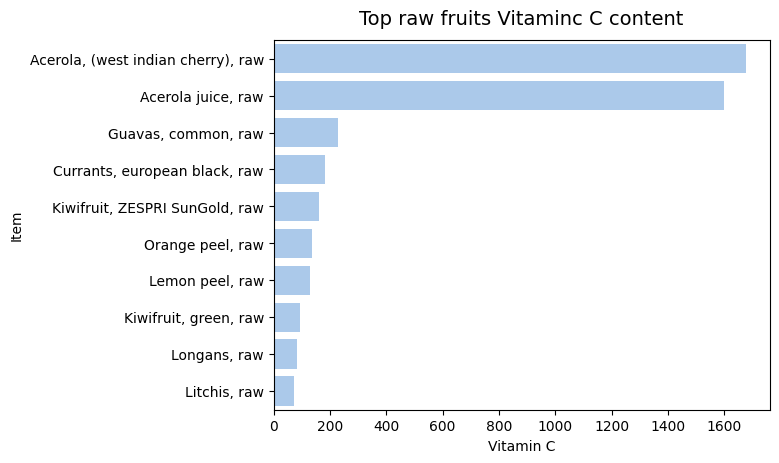

In [182]:
filt_data = fruits.sort_values(['Vitamin C'], ascending=False).head(10)
g = sns.barplot(filt_data, x="Vitamin C", y="Item", legend=False)
g.set_title("Top raw fruits Vitaminc C content", y=1.02, fontsize=14)

g = sns.barplot(filt_data, x="Vitamin C", y="Item", legend=False)
g.set_title("Top raw fruits Vitaminc C content")

## What are some other sources of vitamin C?

In [41]:
df.sort_values(['Vitamin C'], ascending=False).head(10)

,FDC_ID,Item,ItemPart1,ItemPart2,ItemPart3,CategoryPart1,CategoryPart2,CategoryPart3,Calories,Protein,Carbohydrate,Total fat,Cholesterol,Fiber,Water,Alcohol,Vitamin C
3449,173487,"Babyfood, GERBER, 2nd Foods, apple, carrot and...",Babyfood,GERBER,"2nd Foods, apple, carrot, squash, organic",Baby Foods,None,None,64.0,1.10,14.82,0.00,2.0,1.2,83.83,0.0,2732.0
2316,173237,"Beverages, Orange-flavor drink, breakfast type...",Beverages,Orange-flavor drink,"breakfast type, low calorie, powder",Beverages,None,None,217.0,3.60,85.90,0.00,0.0,3.8,1.80,0.0,2400.0
2140,167707,"Beverages, fruit-flavored drink, powder, with ...",Beverages,fruit-flavored drink,"powder, with high vitamin C with other added v...",Beverages,None,None,227.0,0.25,91.00,0.16,0.0,2.2,1.32,0.0,2400.0
1454,169373,"Peppers, sweet, red, freeze-dried",Peppers,sweet,"red, freeze-dried",Vegetables,Vegetable Products,None,314.0,17.90,68.70,3.00,0.0,21.3,2.00,0.0,1900.0
5220,171686,"Acerola, (west indian cherry), raw",Acerola,(west indian cherry),raw,Fruits,Fruit Juices,None,32.0,0.40,7.69,0.30,0.0,1.1,91.41,0.0,1677.6
5221,171687,"Acerola juice, raw",Acerola juice,raw,None,Fruits,Fruit Juices,None,23.0,0.40,4.80,0.30,0.0,0.3,94.30,0.0,1600.0
2373,174143,"Beverages, tea, green, instant, decaffeinated,...",Beverages,tea,"green, instant, decaffeinated, lemon, unsweete...",Beverages,None,None,378.0,0.00,94.45,0.00,0.0,0.0,5.09,0.0,1342.3
1619,170075,"Chives, freeze-dried",Chives,freeze-dried,None,Vegetables,Vegetable Products,None,311.0,21.20,64.29,3.50,0.0,26.2,2.00,0.0,660.0
7016,170921,"Spices, coriander leaf, dried",Spices,coriander leaf,dried,Spices,Herbs,None,279.0,21.93,52.10,4.78,0.0,10.4,7.30,0.0,566.7
2139,167681,"Beverages, fruit-flavored drink, dry powdered ...",Beverages,fruit-flavored drink,"dry powdered mix, low calorie, with aspartame",Beverages,None,None,218.0,0.45,87.38,0.04,0.0,0.1,1.84,0.0,560.0


Text(0.5, 1.02, 'Top items by Vitaminc C content')

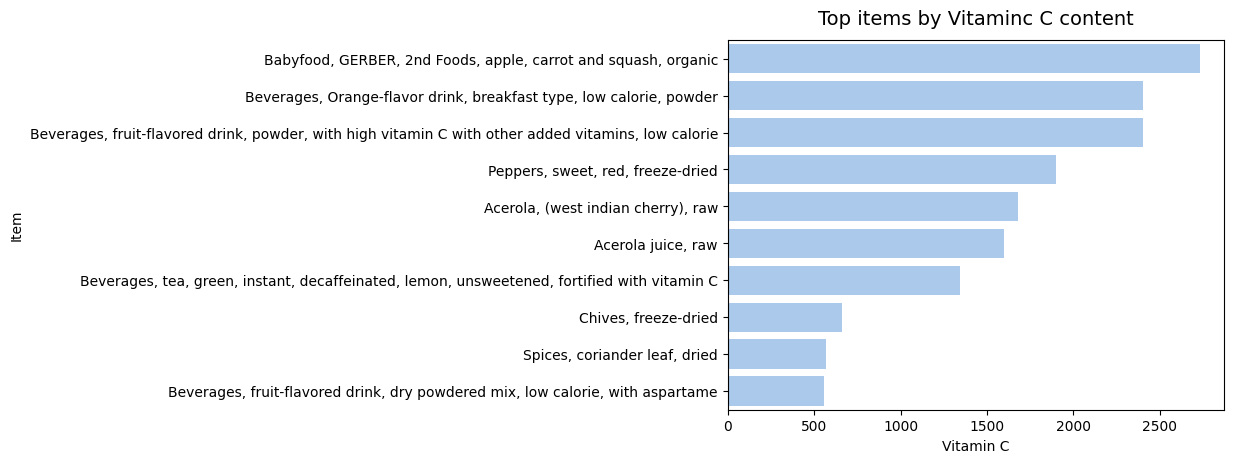

In [181]:
filt_data = df.sort_values(['Vitamin C'], ascending=False).head(10)
g = sns.barplot(filt_data, x="Vitamin C", y="Item")
g.set_title("Top items by Vitaminc C content", y=1.02, fontsize=14)

### by categories

In [43]:
scat = dfcat['Category'].str.strip()\
    .str.replace(" and ", ", ")\
    .str.split(", ", expand=False)\
    .explode()\
    .replace("", None)\
    .str.strip(", .")\
    .dropna()

In [44]:
svitc = dfcat['Vitamin C'].str.split(" ").str.get(0).astype(float).dropna()

In [45]:
df['Vitamin C']

0       NaN
1       0.1
2       NaN
3       NaN
4       0.0
       ... 
7788    0.0
7789    0.0
7790    0.0
7791    0.0
7792    0.0
Name: Vitamin C, Length: 7793, dtype: float64

In [46]:
catvit = pd.merge(
         scat,
         svitc, 
         left_index=True,
         right_index=True,
         how='inner',
).groupby('Category')['Vitamin C'].mean().sort_values(ascending=False).reset_index()

Text(0.5, 1.02, 'Top categories by Vitaminc C average content')

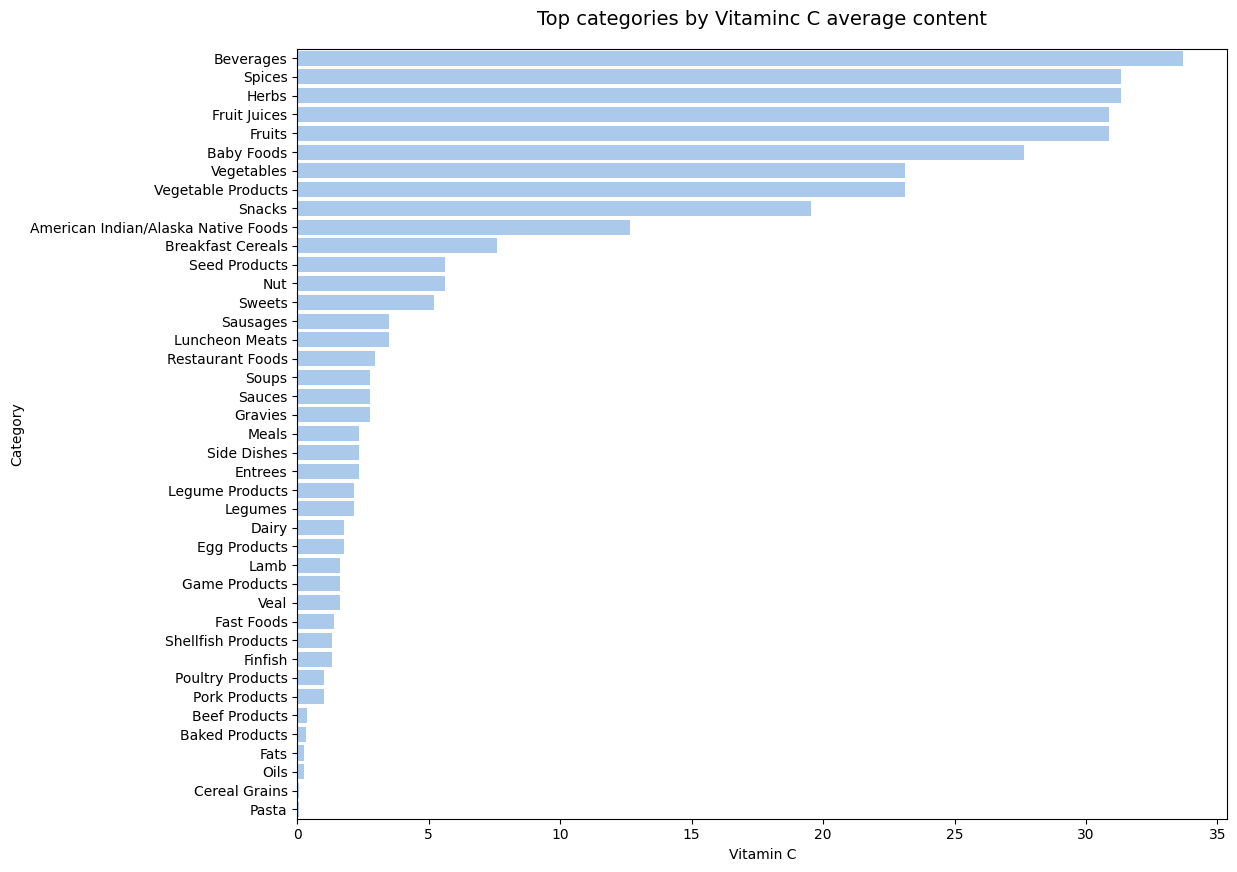

In [190]:
plt.figure(figsize=(12, 10))
g = sns.barplot(catvit, x="Vitamin C", y="Category")
g.set_title("Top categories by Vitaminc C average content", y=1.02, fontsize=14)

### And what beverages have lot of Vit C?

In [177]:
filt_data = pd.merge(
         scat[scat.str.lower().str.contains('beverage')], 
         df[['Item', 'Vitamin C']],
         left_index=True,
         right_index=True,
         how='inner',
).sort_values(by=['Vitamin C'], ascending=False).head(10).drop('Category', axis=1)


In [179]:
filt_data.style.format(precision=0, thousands=".", decimal=",").background_gradient(cmap='Blues')

,Item,Vitamin C
2316,"Beverages, Orange-flavor drink, breakfast type, low calorie, powder",2.400
2140,"Beverages, fruit-flavored drink, powder, with high vitamin C with other added vitamins, low calorie",2.400
2373,"Beverages, tea, green, instant, decaffeinated, lemon, unsweetened, fortified with vitamin C",1.342
2139,"Beverages, fruit-flavored drink, dry powdered mix, low calorie, with aspartame",560
2321,"Beverages, Orange-flavor drink, breakfast type, with pulp, frozen concentrate.",243
2314,"Beverages, orange-flavor drink, breakfast type, powder",231
2489,"Beverages, Orange drink, breakfast type, with juice and pulp, frozen concentrate",190
2382,"Beverages, Fruit punch drink, frozen concentrate",156
2253,"Beverages, UNILEVER, SLIMFAST Shake Mix, high protein, whey powder, 3-2-1 Plan,",104
2211,"Beverages, tea, instant, lemon, with added ascorbic acid",100


Text(0.5, 1.02, 'Top beverages by Vitaminc C content')

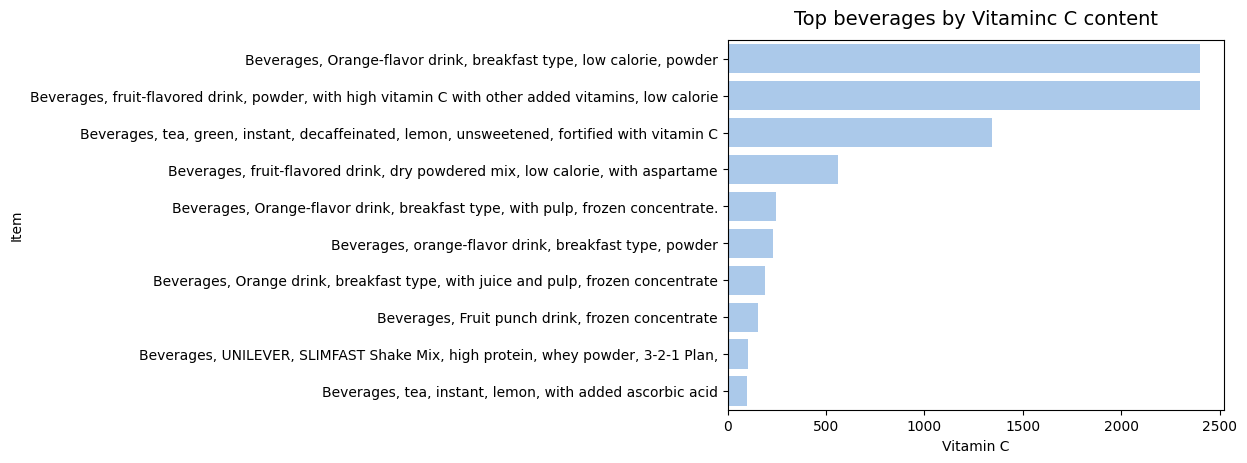

In [174]:
g = sns.barplot(filt_data, x="Vitamin C", y="Item")
g.set_title("Top beverages by Vitaminc C content", y=1.02, fontsize=14)

# Describe the relationship between the calories and water content of a food item.

In [51]:
dft = df.filter(regex='Item$|Calories|Water|CategoryPart')
dft.head().style.format(precision=0, thousands=".", decimal=",")

,Item,CategoryPart1,CategoryPart2,CategoryPart3,Calories,Water
0,"Pillsbury Golden Layer Buttermilk Biscuits, Artificial Flavor, refrigerated dough",Baked Products,None,None,307,36
1,"Pillsbury, Cinnamon Rolls with Icing, refrigerated dough",Baked Products,None,None,330,28
2,"Kraft Foods, Shake N Bake Original Recipe, Coating for Pork, dry",Baked Products,None,None,377,3
3,"George Weston Bakeries, Thomas English Muffins",Baked Products,None,None,232,43
4,"Waffles, buttermilk, frozen, ready-to-heat",Baked Products,None,None,273,40


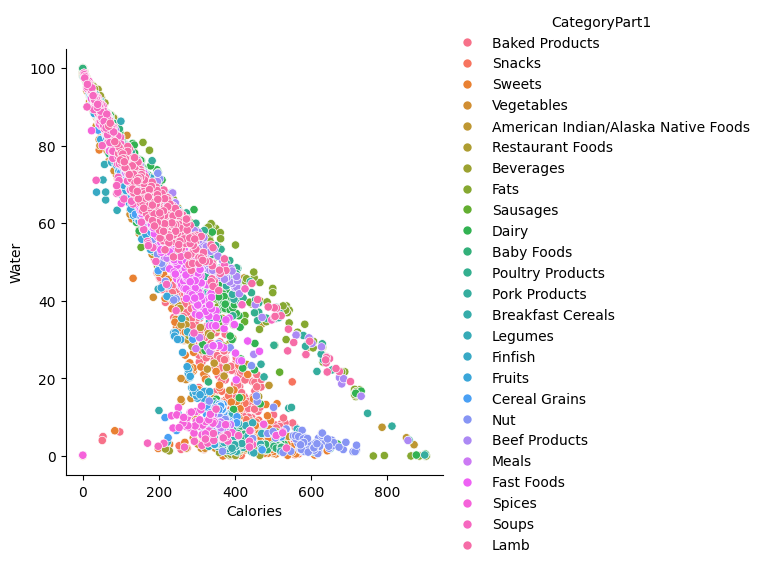

In [52]:
sns.relplot(x="Calories", y="Water", 
            data=dft,
            kind="scatter",
            hue="CategoryPart1")


# What are the possible drawbacks of a zero-carb diet? What could be the drawbacks of a very high-protein diet?

## What are the possible drawbacks of a zero-carb diet? 

In [53]:
mask = df['Carbohydrate']==0

In [54]:
df['zero_carbo'] = mask

In [55]:
df[mask].agg(['count', 'nunique', lambda x: x.isnull().sum()]).T\
    .rename(columns={'<lambda>': 'nulls'})\
    .style.background_gradient(cmap='Blues')

,count,nunique,nulls
FDC_ID,2138,2138,0
Item,2138,2138,0
ItemPart1,2138,98,0
ItemPart2,2134,318,4
ItemPart3,2076,1709,62
CategoryPart1,2138,19,0
CategoryPart2,729,8,1409
CategoryPart3,397,2,1741
Calories,2138,368,0
Protein,2138,1207,0


In [56]:
props = ['Calories',
 'Protein',
 'Carbohydrate',
 'Total fat',
 'Cholesterol',
 'Fiber',
 'Water',
 'Alcohol',
 'Vitamin C',]

In [57]:
dft = pd.merge(
         df[props].stack().reset_index(-1).rename(columns={'level_1': 'Props', 0: 'Value'}), 
         df['zero_carbo'],
         left_index=True,
         right_index=True,
         how='inner',
)
dft

,Props,Value,zero_carbo
0,Calories,307.00,False
0,Protein,5.88,False
0,Carbohydrate,41.18,False
0,Total fat,13.24,False
0,Cholesterol,0.00,False
...,...,...,...
7792,Cholesterol,75.00,True
7792,Fiber,0.00,True
7792,Water,68.21,True
7792,Alcohol,0.00,True


In [58]:
import seaborn.objects as so

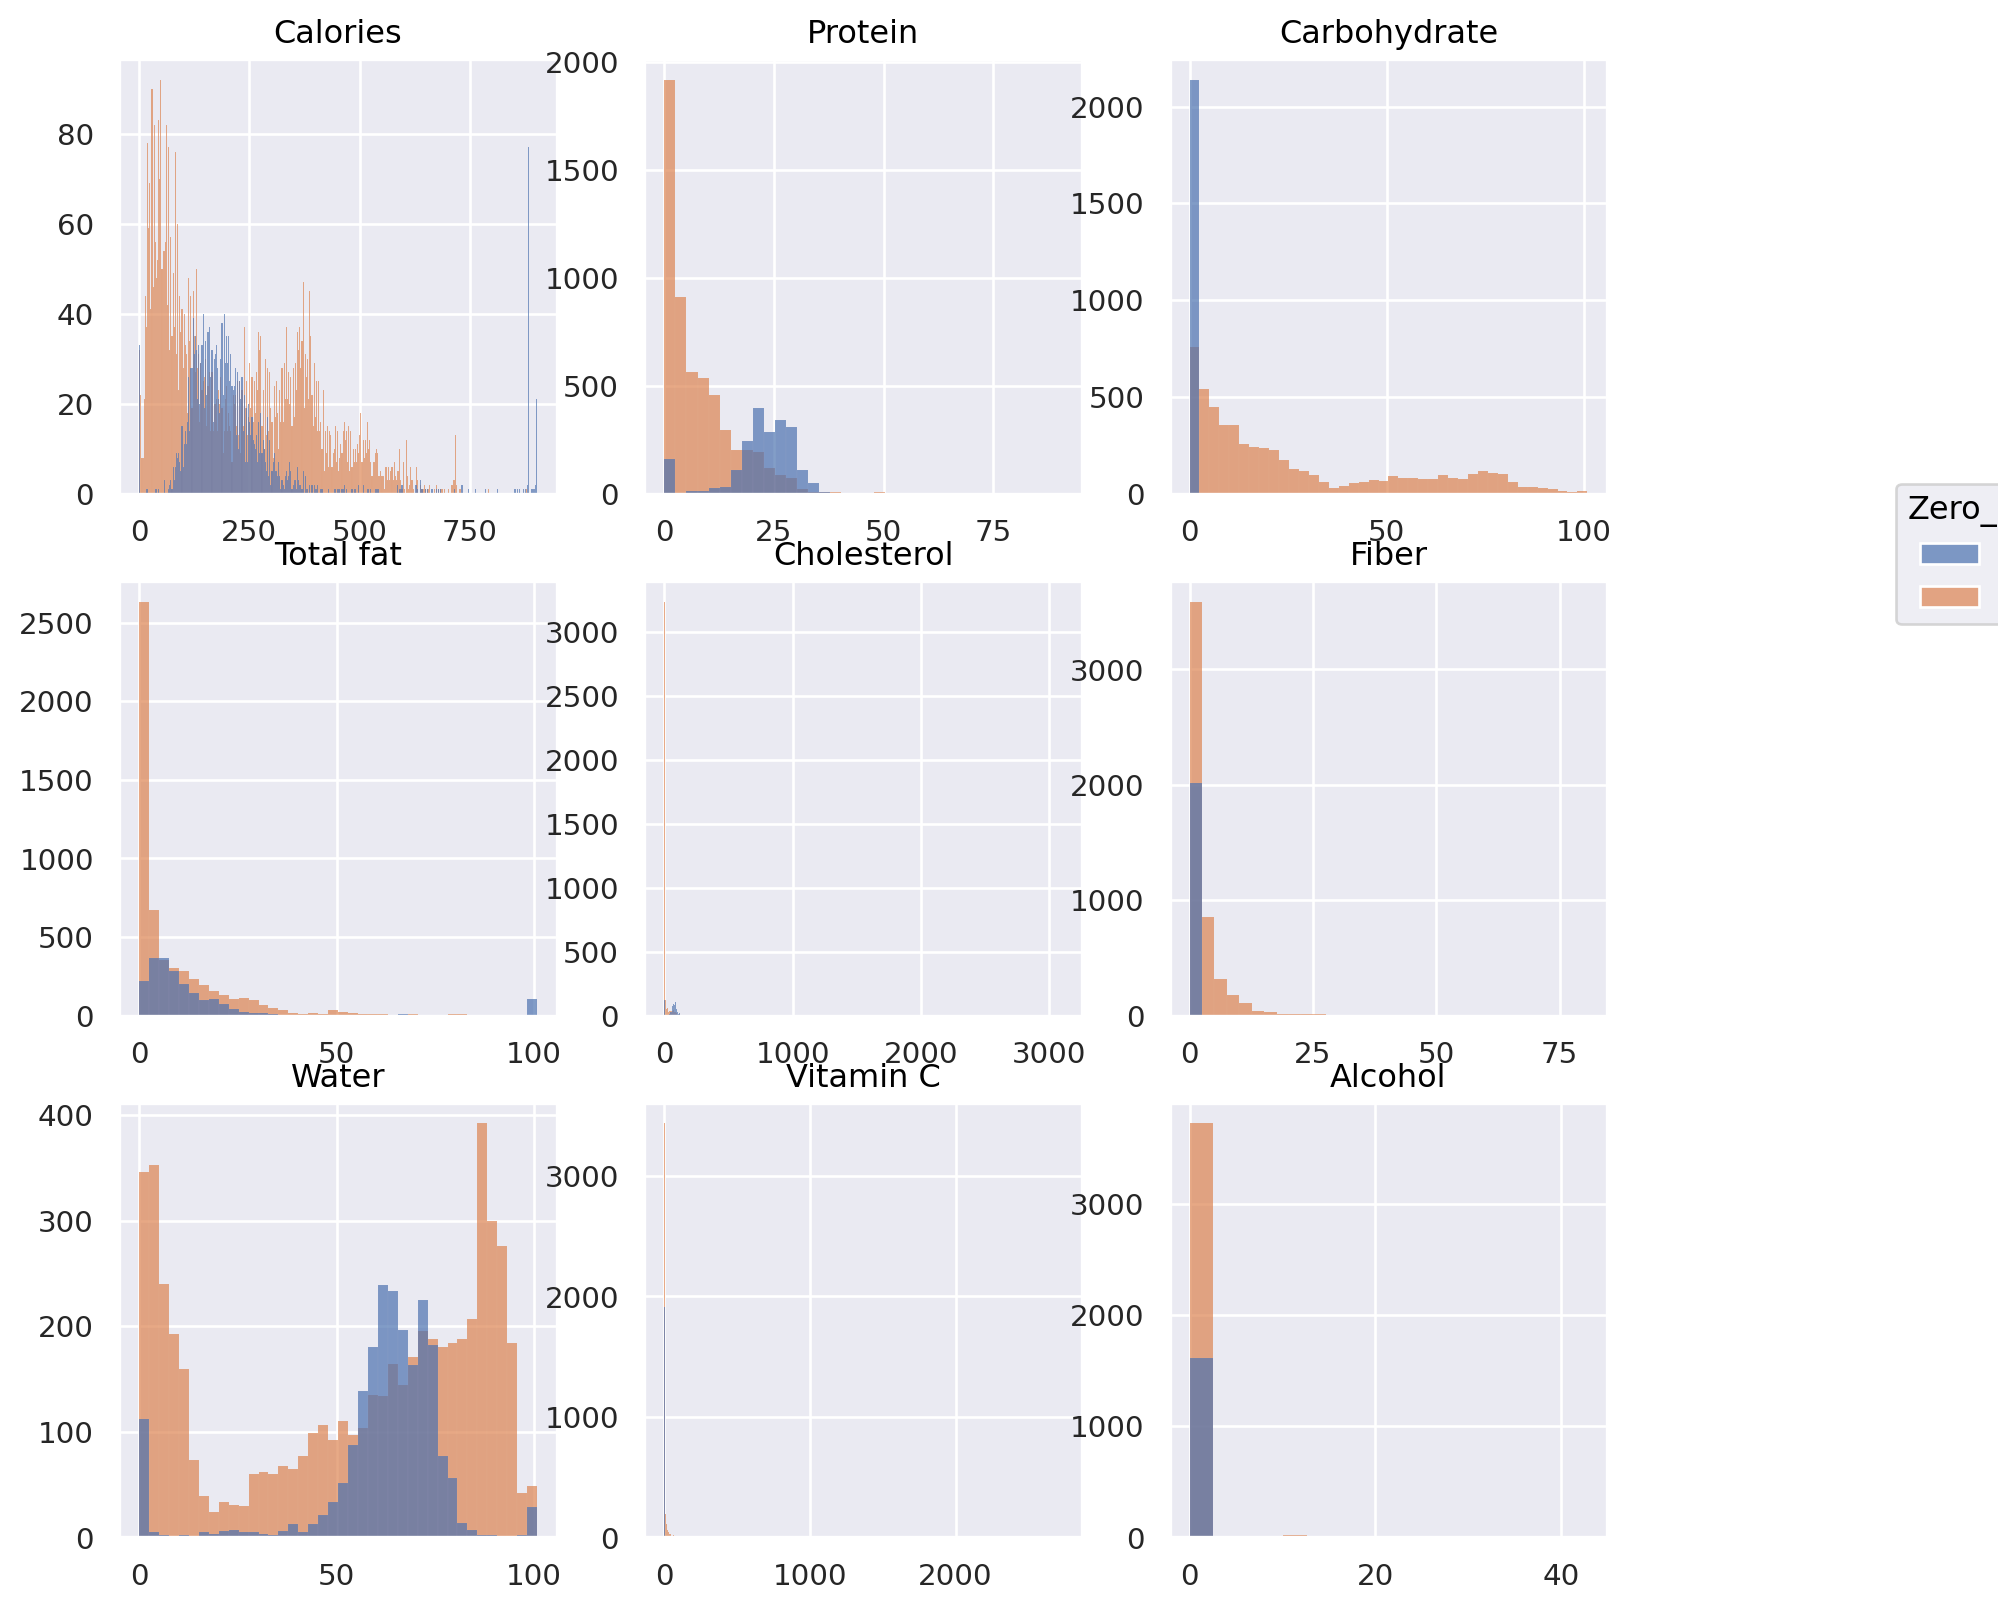

In [59]:
f = plt.Figure(figsize=(10, 10))
(
    so.Plot(dft, x="Value", color='zero_carbo')
    .facet(col="Props", wrap=3)
    .share(x=False, y=False)
    .add(so.Bars(), so.Hist())
    .on(f)
    .label(
        x="", y="",
        color=str.capitalize,
        title="{}".format,
    )

)

##### Comments
Zero-carbo (blue area) products are correlated with:

- low-medium levels of protein.
- often good levels of water
- not outstanding levels of fat



## What could be the drawbacks of a very high-protein diet?

In [60]:
mask = df['Protein'] > df['Protein'].quantile(.90)

In [61]:
df['high_protein'] = mask

In [152]:
dft = pd.merge(
         df[props].stack().reset_index(-1).rename(columns={'level_1': 'Props', 0: 'Value'}), 
         df['high_protein'],
         left_index=True,
         right_index=True,
         how='inner',
)
dft

,Props,Value,high_protein
index,,,
0,Calories,307.00,False
0,Protein,5.88,False
0,Carbohydrate,41.18,False
0,Total fat,13.24,False
0,Cholesterol,0.00,False
...,...,...,...
7792,Cholesterol,75.00,True
7792,Fiber,0.00,True
7792,Water,68.21,True


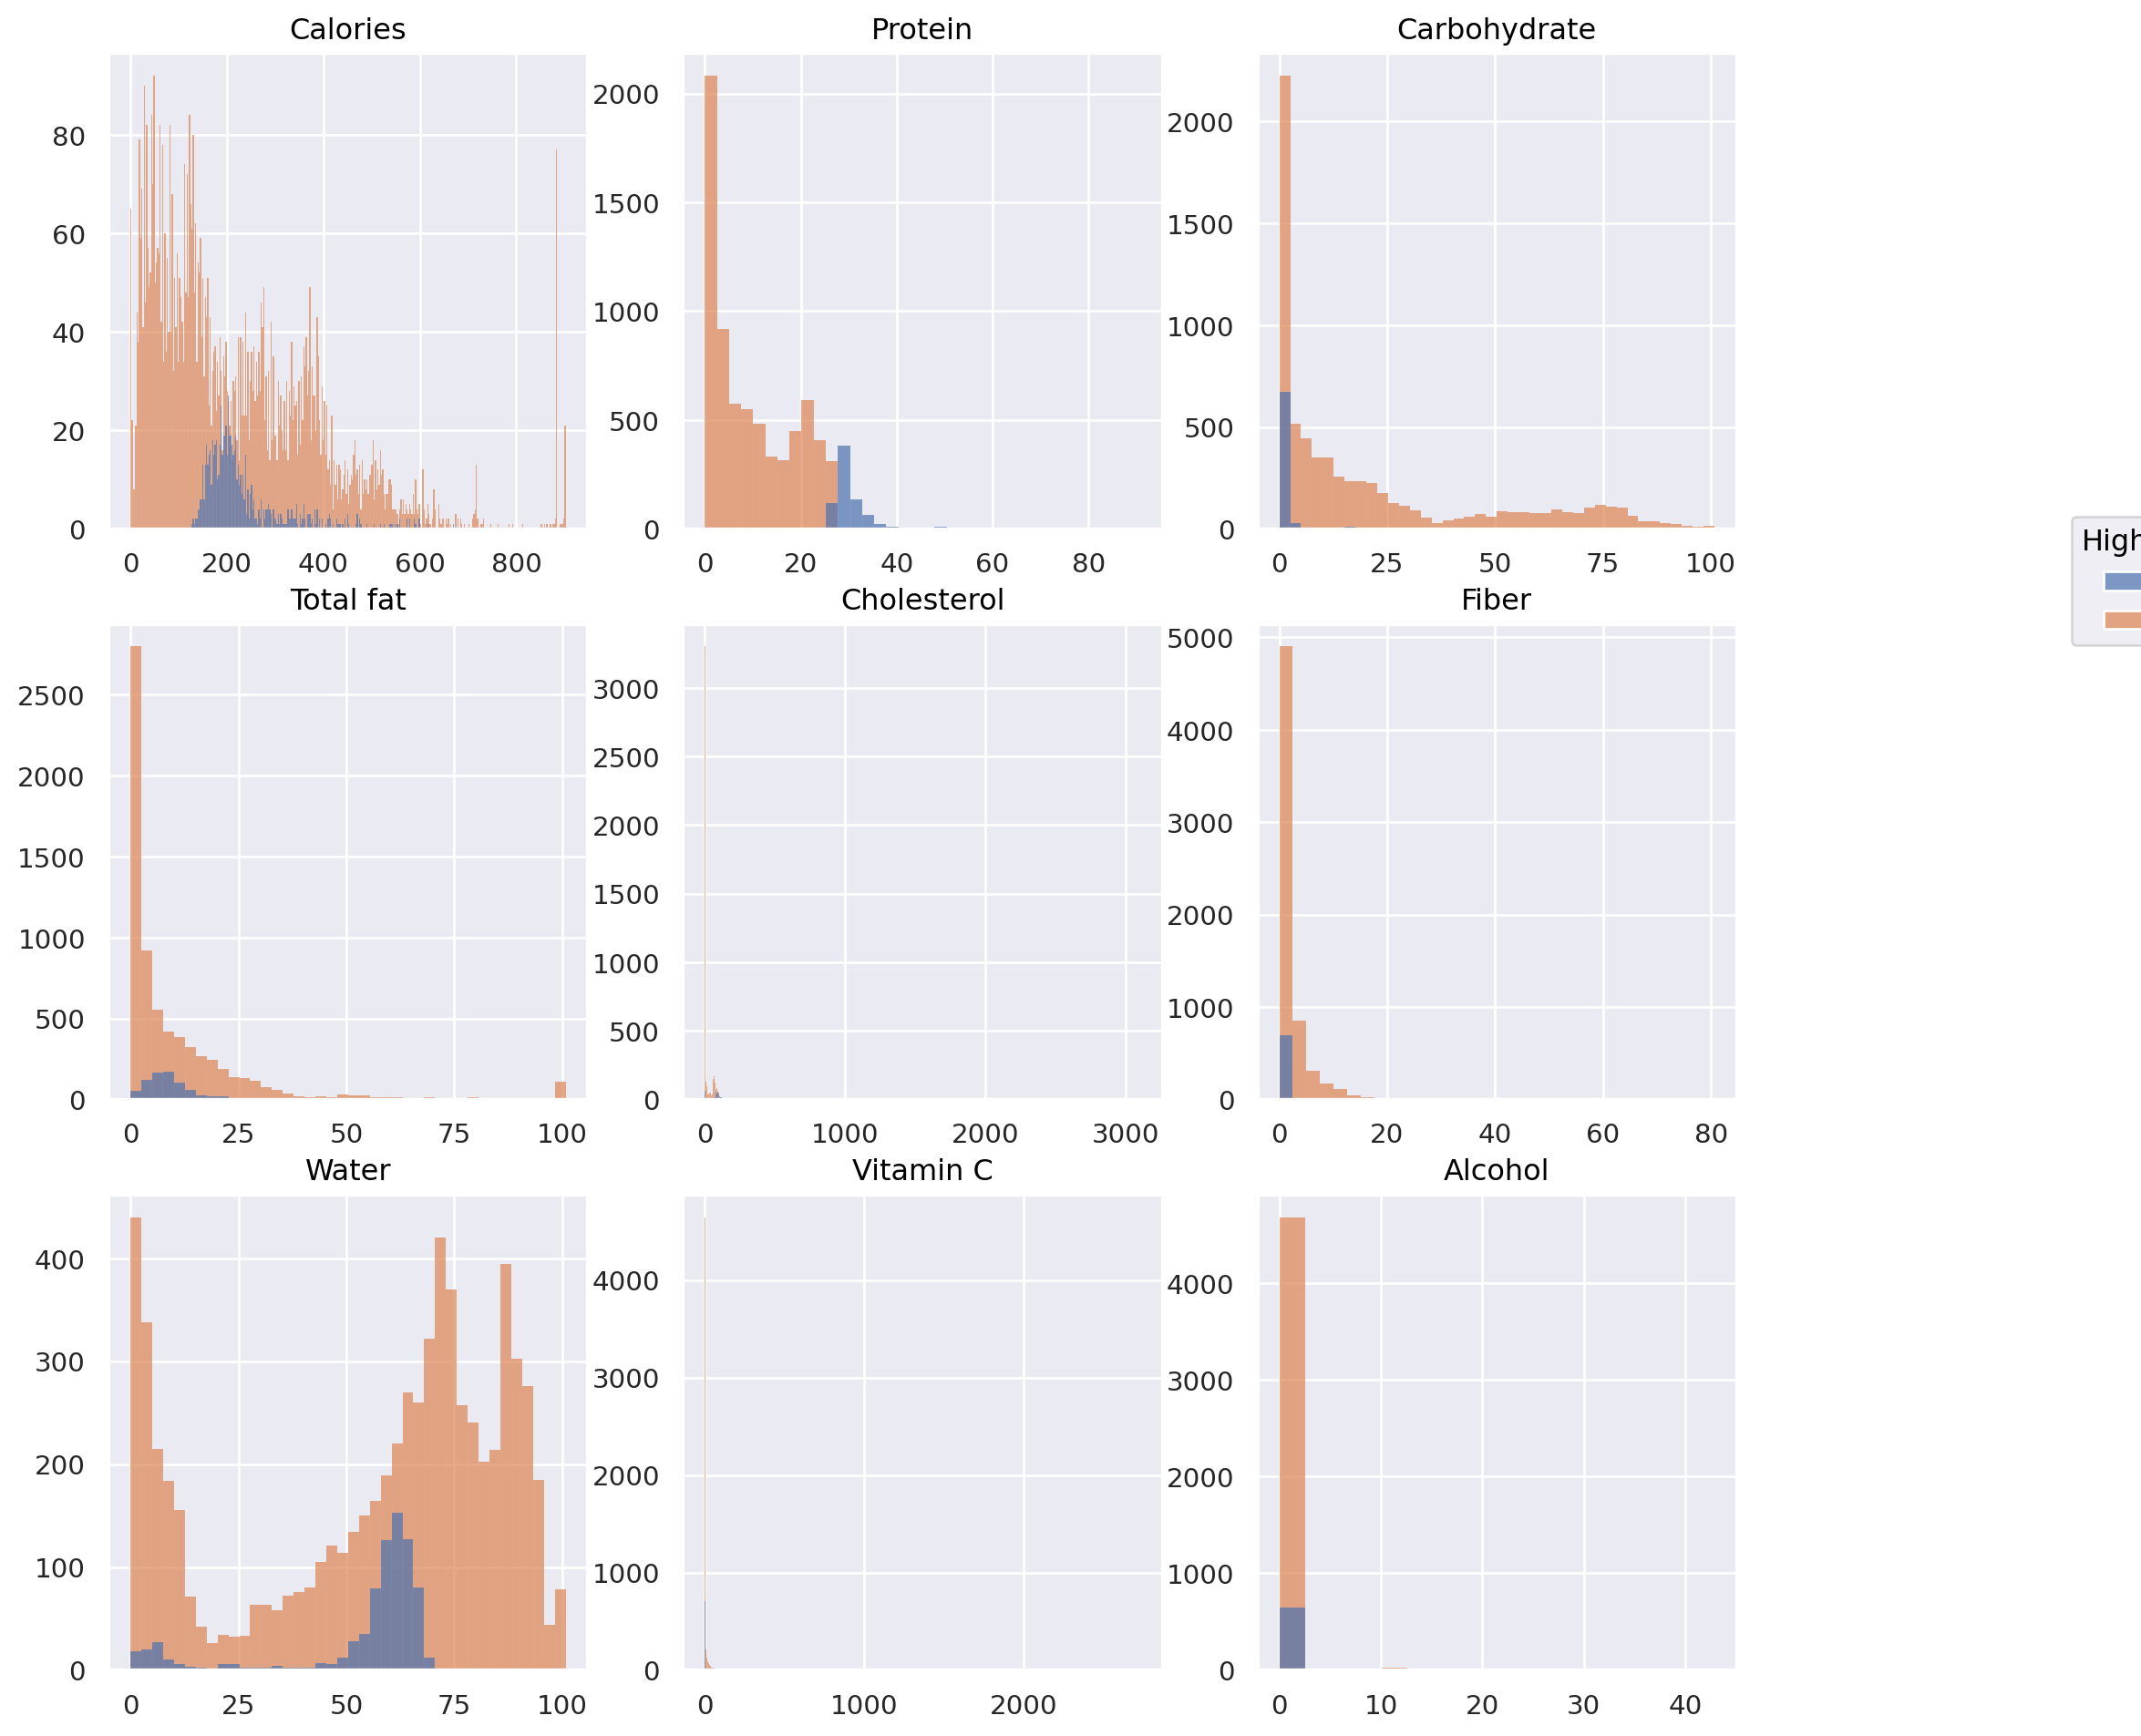

In [169]:
f = plt.Figure(figsize=(12, 12))
(
    so.Plot(dft, x="Value", color='high_protein')
    .facet(col="Props", wrap=3)
    .share(x=False, y=False)
    .add(so.Bars(), so.Hist())
    .on(f)
    .label(
        x="", y="",
        color=str.capitalize,
        title="{}".format,
    )

)

##### Comments
High-protein (blue area) products are correlated with:

- low or null carbohydrates products, same for fiber.
- significant lower fats and water levels



# Fitting a linear model to test whether estimates agree with the data.

## Calculate estimated kcal

In [64]:
df['estimated_kcal'] = df[['Protein', 'Carbohydrate', 'Total fat']].fillna(0).apply(lambda x:
    x[0]*4 + x[1]*4 + x[2]*9, axis=1)

/tmp/ipykernel_6231/385081708.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x[0]*4 + x[1]*4 + x[2]*9, axis=1)


<Axes: >

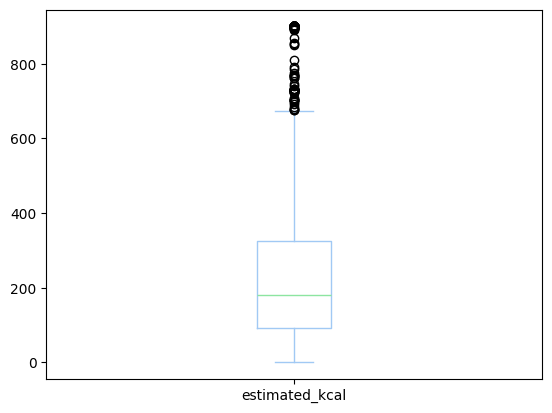

In [66]:
df['estimated_kcal'].plot.box()

## Fit linear model

In [67]:
from sklearn.linear_model import LinearRegression

In [68]:
X = df[['Protein', 'Carbohydrate', 'Total fat']]
y = df['Calories']

In [69]:
X.agg(['count', 'nunique', lambda x: x.isnull().sum()]).T\
    .rename(columns={'<lambda>': 'nulls'})\
    .style.background_gradient(cmap='Blues')

,count,nunique,nulls
Protein,7793,2638,0
Carbohydrate,7793,3135,0
Total fat,7793,2366,0


In [70]:
X.dtypes

Protein         float64
Carbohydrate    float64
Total fat       float64
dtype: object

In [71]:
reg = LinearRegression().fit(X, y)

In [72]:
reg.score(X, y)

0.9897535862208672

In [73]:
reg.coef_

array([4.00204437, 3.79862627, 8.80413501])

In [74]:
reg.intercept_

4.0799620446945255

## See model metrics

In [75]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [76]:
r2_score(df['Calories'], df['estimated_kcal'])

0.9884057798449772

In [77]:
mean_absolute_error(df['Calories'], df['estimated_kcal'])

6.964117156422431

In [78]:
mean_squared_error(df['Calories'], df['estimated_kcal'])

330.1291212017195

# Analyze the errors of your linear model to see what could be the hidden sources of calories in food.

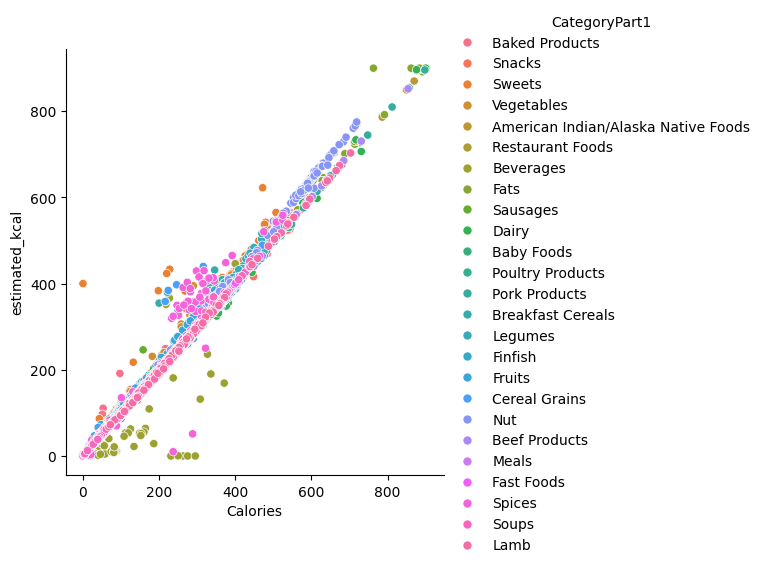

In [150]:
plt.Figure(figsize=(10, 10))
g = sns.relplot(x="Calories", y="estimated_kcal", 
            data=df,
            hue='CategoryPart1',
            kind="scatter")


Text(0.5, 1.03, 'Real vs Estimated Kilocalories for Normal and Zero-Carbo Products')

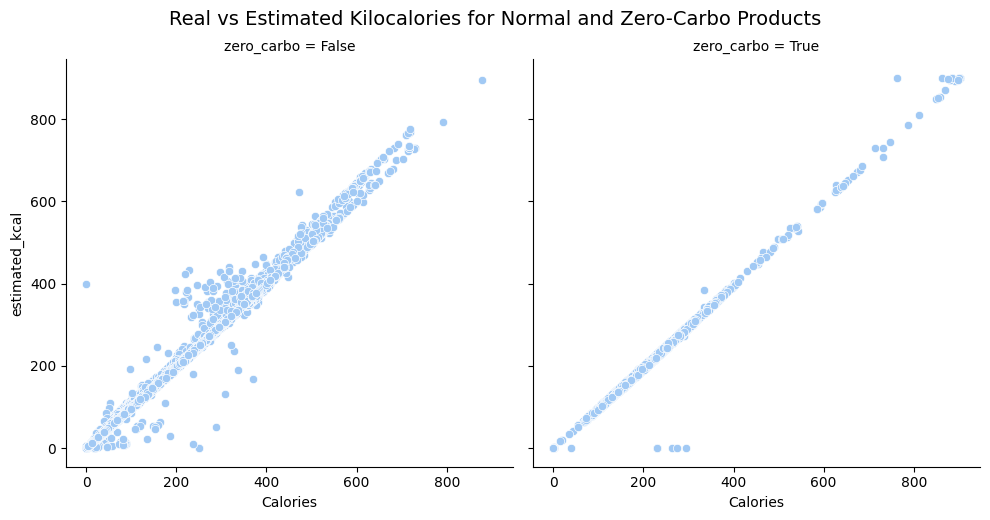

In [141]:
g = sns.relplot(x="Calories", y="estimated_kcal", 
            data=df,
            col='zero_carbo',
            kind="scatter")
g.fig.suptitle("Real vs Estimated Kilocalories for Normal and Zero-Carbo Products", y=1.03, fontsize = 14)


##### Comments:
- Zero-carbo products are more likely to be well estimated on kilocalories, except the highest calories ones (above 900)
- Rest of products concentrate the errors in two ranges, between 0 to 100kcal, and from 200 to 400.

Text(0.5, 1.03, 'Real vs Estimated Kilocalories for Normal and High-Protein Products')

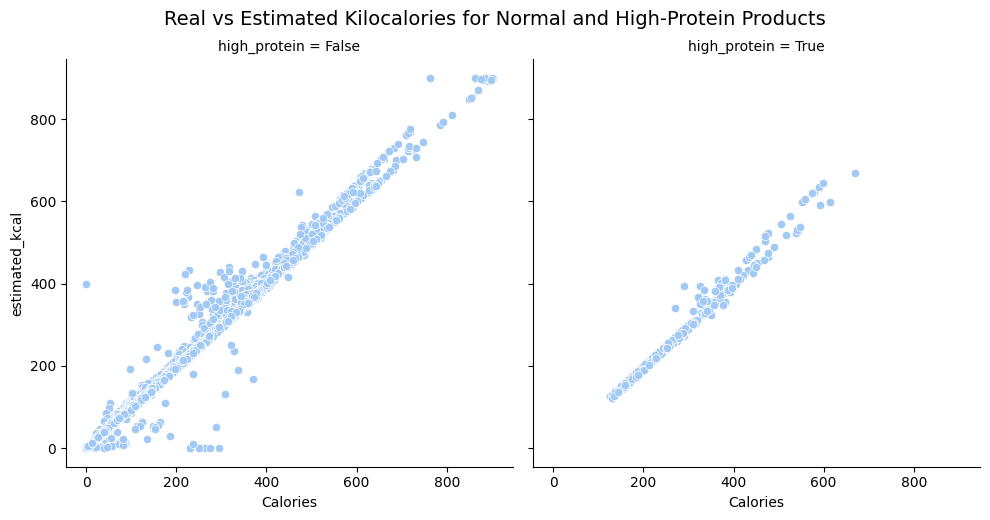

In [143]:
g = sns.relplot(x="Calories", y="estimated_kcal", 
            data=df,
            col='high_protein',
            kind="scatter")
g.fig.suptitle("Real vs Estimated Kilocalories for Normal and High-Protein Products", y=1.03, fontsize = 14)


In [82]:
df['estimated_abs_error'] = abs(df['estimated_kcal'] - df['Calories'])


In [83]:
dft = df[
    df['estimated_abs_error'] > 0
].filter(regex='Part1|Part2|error')

##### TOP 15 Worst Estimated KCal Products

In [102]:
dft.nlargest(15, 'estimated_abs_error').style.background_gradient(cmap='Blues')

,ItemPart1,ItemPart2,CategoryPart1,CategoryPart2,estimated_abs_error
1048,Sweetener,herbal extract powder from Stevia leaf,Sweets,None,400.000000
2334,Alcoholic beverage,distilled,Beverages,None,295.000000
2333,Alcoholic beverage,distilled,Beverages,None,275.000000
2213,Alcoholic beverage,distilled,Beverages,None,263.000000
2212,Alcoholic beverage,distilled,Beverages,None,249.600000
2422,Alcoholic beverage,distilled,Beverages,None,249.600000
7069,Vanilla extract,None,Spices,Herbs,236.620000
2418,Alcoholic beverage,distilled,Beverages,None,231.000000
2420,Alcoholic beverage,distilled,Beverages,None,231.000000
2421,Alcoholic beverage,distilled,Beverages,None,231.000000


##### Comments
- Alcohol is the most frequent reason for error in estimating the calories of a product
- The product with the biggest error calories estimation is sweetener from Stevia leaf, with a significant different to the second worst estimated product.

##### Ranking of Worst Estimated KCal Categories

In [94]:
df.groupby('CategoryPart1')['estimated_abs_error'].mean().sort_values(ascending=False)

CategoryPart1
Spices                                 61.339048
Nut                                    30.804015
Beverages                              19.986148
Breakfast Cereals                      14.314513
Cereal Grains                          11.593591
Sweets                                 10.901620
Fats                                    9.925000
Legumes                                 9.828379
Snacks                                  7.834432
Fruits                                  7.665887
Vegetables                              6.566364
Finfish                                 5.223087
Baked Products                          5.005590
Lamb                                    4.681034
Poultry Products                        4.394360
Pork Products                           4.327232
Beef Products                           3.762306
Dairy                                   2.807698
Sausages                                2.791198
Baby Foods                              2.080319
Soups 

##### Comments
- Spices and Nuts are the worst estimated categories
- Spices doubles on error to the second category, Nuts.


##### TOP 3 worst kcal estimated products per category 

In [130]:
df.index.name = 'index'
s = df.groupby('CategoryPart1')['estimated_abs_error'].nlargest(3)
s.index.name = 'index'

In [185]:
dft = pd.merge(
         df[['Item']], 
         s,
         left_index=True,
         right_index=True,
         how='inner',
).style.background_gradient(cmap='Blues').format(precision=0, thousands=".", decimal=",")
dft
